# **PENENTUAN LOKASI IDEAL INVESTASI SEWA  PROPERTI AIRBNB BANGKOK**

# **A. Latar Belakang Masalah**

Pada project data analysis ini kita akan membantu investor asing yang akan menanamkan modalnya pada bisnis penyewaan properti di kelas premium di daerah Bangkok dengan menggunakan aplikasi airbnb. 

Air Bed & Breakfast (Airbnb) menyediakan APP/online market place untuk mengkoneksikan PROPERTY HOST and PEOPLE yang mencari HOMESTAY di lokasi tertentu. Ini bisnis dimasa depan.

Keputusan investor untuk menanamkan modal tersebut akan didasarkan beberapa faktor seperti: harga sewa, lokasi, tingkat hunian, dan popularitas lokasi.

Untuk itu masalah yang harus dijawab adalah:
Dimana lokasi yang paling ideal bagi investor untuk berinvestasi? 

Selain itu harus dijawab juga beberapa pertanyaan tambahan ini:
1. bagaimana klasifikasi daerah berdasarkan tingkat harga sewa,
1. bagaimana klasifikasi daerah berdasarkan tingkat rata-rata listing airbnb,
1. bagaimana klasifikasi daerah berdasarkan occupancy rate, 
1. bagaimana klasifikasi daerah berdasarkan popularitas review penyewa,
1. bagaimana strategi investor dalam penentuan harga sewa,
1. bagaimana strategi investor dalam menentukan type properti yang akan disewakan,
1. Bagaimana strategi kompetisi dalam penyewaan properti yang akan dihadapi oleh investor.

Metode yang digunakan untuk menganalisis data adalah melalui tahapan:
1. Data collecting: di samping data yang telah tersedia juga diperlukan data lain seperti koordinat map dan keterangan umum mengenai lokasi neighbourhood,
1. Data understanding: menggunakan deskriptif untuk memahami data secara umum, seperti: dimensi dataset, standar deviasi, normalitas data, mean, median, data kosong dan sebagainya,
1. Data cleaning: pembersihan data yang dilakukan dengan merapihkan format penulisan, dan penanganan data kosong bila diperlukan,
1. data analisis: yaitu menganalisis data yang telah dipersiapkan guna dapat menjawab pertanyaan utama dari project ini yaitu menentukan lokasi mana yang paling ideal bagi investor untuk berinvestasi properti AirBNB di Bangkok
1. Kesimpulan dan Rekomendasi


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy.stats import f_oneway
from scipy.stats import spearmanr

import warnings
warnings.filterwarnings("ignore")

## Tampilan Data AIRBNB

In [2]:

airbnbBangkok = pd.read_csv('/Users/andreardi/Desktop/Capstone Modul 2/Airbnb Listings Bangkok.csv')
airbnbBangkok.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


Deskripsi Kolom:

* id: Airbnb's unique identifier for the listing 

* name: Name of the listing.

* host_id: Airbnb's unique identifier for the host/user.

* host_name: Name of the host

* neighborhood: The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.

* latitude: Uses the World Geodetic System (WGS84) projection for latitude and longitude.

* longitude: Uses the World Geodetic System (WGS84) projection for latitude and longitude.

* room_type: [Entire home/apt |Private room| Shared room| Hotel]

* price: Daily price in local currency
* minimum_nights: The minimum number of night stays for the listing (calendar rules may differ).
* number_of_reviews: The number of reviews the listing has.
* last_review: The date of the last/newest review.
* calculated_host_listings_count: The number of listings the host has in the current scrape in the city/region geography.
* availability_365: avaliability_x. The calendar determines the availability of the listing x days in the future. 
* number_of_reviews_ltm: The number of reviews the listing has (in the last 12 months).

# **B. Data Understanding And Cleaning**

In [3]:
#Data understanding: shape

print(f'Jumlah baris dan kolom = {airbnbBangkok.shape}')

Jumlah baris dan kolom = (15854, 17)


In [4]:
#Data understanding: info

print(f'Info data airbnbBangkok: ')
airbnbBangkok.info()


Info data airbnbBangkok: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_r

In [5]:
#Data understanding: describe() data numerik
#Data numerik 'unnamed:', 'id', 'host_id', 'latitude', 'longitude' tidak di describe karena merupakan data nominal.

airbnbBangkok[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,15854.0,3217.703923,24972.122358,0.00,900.00,1429.000,2429.00,1100000.00
minimum_nights,15854.0,15.292355,50.815020,1.00,1.00,1.000,7.00,1125.00
number_of_reviews,15854.0,16.654157,40.613331,0.00,0.00,2.000,13.00,1224.00
reviews_per_month,10064.0,0.813145,1.090196,0.01,0.12,0.435,1.06,19.13
calculated_host_listings_count,15854.0,13.889618,30.269848,1.00,1.00,4.000,13.00,228.00
availability_365,15854.0,244.378643,125.843224,0.00,138.00,309.000,360.00,365.00
number_of_reviews_ltm,15854.0,3.481519,8.916937,0.00,0.00,0.000,3.00,325.00


In [6]:
#Data understanding: describe data 'object'

airbnbBangkok.describe(include='object').T

,count,unique,top,freq
name,15846,14794,New! La Chada Night Market studio 2PPL near MRT,45
host_name,15853,5312,Curry,228
neighbourhood,15854,50,Vadhana,2153
room_type,15854,4,Entire home/apt,8912
last_review,10064,1669,2022-12-11,189


In [7]:
airbnbBangkok.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Dari data terlihat bahwa ada empat kolom data kosong: 'name', 'host_name', 'review_per_month', dan 'last_review'.

<Axes: >

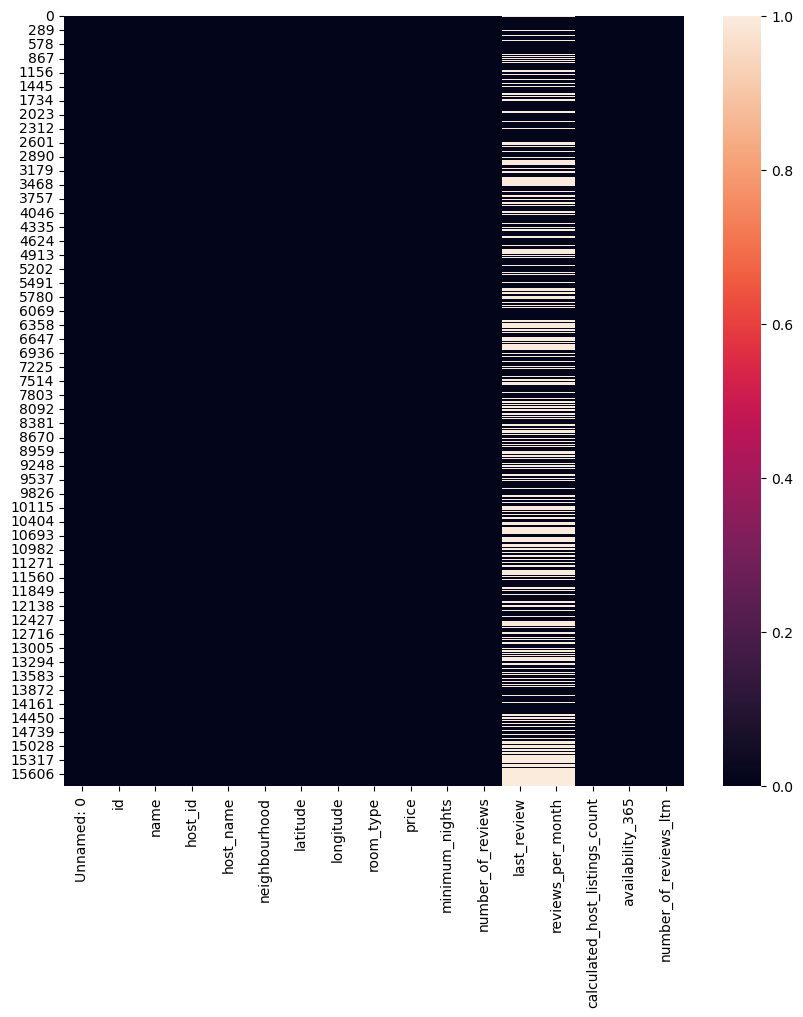

In [8]:
#Tampilkan heatmap untuk melihat data kosong

plt.figure(figsize=(10,10))
sns.heatmap(airbnbBangkok[['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']].isna())

Untuk kolom 'last_review' dan 'review_per_month' terlihat bahwa NaN keduanya berhubungan (MaR=Missing at Random). Data kosong pada keduanya bisa dipastikan bahwa karena memang tidak ada review sehingga tidak perlu isi. Hanya saja untuk review_per_month NaN perlu diganti dengan 0 agar dapat dikalkulasi. Untuk last_review dibiarkan saja NaN karena merupakan tanggal review tidak perlu kalkulasi

In [9]:
#Menggantikan data kosong NaN pada kolom 'revies_per_month' dengan value 0 agar dapat dikalkulasi

airbnbBangkok['reviews_per_month'].fillna(value=0, inplace=True)

In [10]:
#Cek kembali data kosong

airbnbBangkok.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Tinggal tiga kolom berisi data kosong

In [11]:
#Mengecek data kosong pada kolom 'host_name"

airbnbBangkok1 = airbnbBangkok.isna()
airbnbBangkok1[airbnbBangkok1['host_name']]==True

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


Kolom host_name yang kosong ada pada index baris 3571

In [12]:
#Cek indeks baris data kosong

airbnbBangkok.iloc[3571]

Unnamed: 0                                 3571
id                                     19682464
name                              Cozy Hideaway
host_id                               137488762
host_name                                   NaN
neighbourhood                         Bang Kapi
latitude                               13.76999
longitude                             100.63769
room_type                          Private room
price                                      1399
minimum_nights                                3
number_of_reviews                             1
last_review                          2017-07-29
reviews_per_month                          0.02
calculated_host_listings_count                1
availability_365                            365
number_of_reviews_ltm                         0
Name: 3571, dtype: object

In [13]:
#Mengecek data kosong pada kolom 'name'

airbnbBangkok1[airbnbBangkok1['name']]==True

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
544,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
572,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
669,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1030,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1282,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1594,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2075,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Data kosong pada kolom 'name' ada pada baris index: 439, 544, 572, 669, 1030, 1282, 1594, 2075

In [14]:
#Cek indeks baris data kosong

airbnbBangkok.iloc[[439, 544, 572, 669, 1030, 1282, 1594, 2075]]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,0.00,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,0.00,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,0.00,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,0.00,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,0.00,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,0.00,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Data kosong pada kolom 'name' dan 'host_name karena merupakan data kategorikal sebaiknya diabaikan saja

In [15]:
#menghilangkan kolom yang dianggap tidak diperlukan

airbnbBangkok.drop('Unnamed: 0', axis=1, inplace=True)
airbnbBangkok

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,0.00,14,365,0


<function matplotlib.pyplot.show(close=None, block=None)>

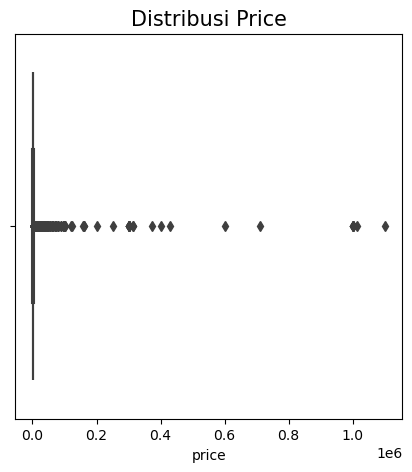

In [16]:
#Mengecek distribusi normal kolom 'price'

plt.figure(figsize=(5,5))
sns.boxplot(x=airbnbBangkok['price'])
plt.title('Distribusi Price', size=15)
plt.show

Pengecekan nilai pada kolom 'price' menunjukkan distribusi yang sangat tidak normal (rightskewed)

In [17]:
#pengecekan outliers pada kolom 'price'

airbnbBangkok.sort_values('price', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,Lucio,Vadhana,13.742186,100.560394,Entire home/apt,1100000,14,0,NaN,0.00,1,365,0
12300,562972065309061724,3B中文No Guest Service Fee@Nana Asok/Soi11 Night...,131427125,Jj,Vadhana,13.746660,100.559100,Entire home/apt,1014758,30,2,2022-09-17,0.32,10,75,2
4620,23740993,"Modern&Luxury apartment,5min to MRT,freeWifi",30803267,Yasmine,Huai Khwang,13.760650,100.568980,Entire home/apt,1000000,1,12,2020-03-24,0.22,4,336,0
6289,29909847,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,210559448,Cora,Khlong Toei,13.703330,100.592470,Entire home/apt,1000000,2,69,2020-03-12,1.39,6,90,0
1239,8880974,"Modern,wifi,5m MRT&2 Shopping Mall",30803267,Yasmine,Huai Khwang,13.759950,100.569360,Entire home/apt,1000000,100,45,2016-09-05,0.51,4,180,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15401,772815799000677300,Mixed Dorm 10 Bunkbed at Amazing khaosan Hostel 2,488818866,Thanet,Phra Nakhon,13.762439,100.503922,Shared room,280,1,0,NaN,0.00,12,356,0
15455,776042168224443103,1 Upper-Bunk Bed /w Shared Bath,219048748,Kay,Suanluang,13.712770,100.606230,Shared room,280,1,0,NaN,0.00,7,365,0
15456,776071884102373052,1 Lower-Bunk Bed /w Shared Bath,219048748,Kay,Suanluang,13.711320,100.605730,Shared room,280,1,0,NaN,0.00,7,365,0
15551,781516205530971982,Artist Private AirRoom 10min2SkytrainPetFriendly,11346360,Upside,Phasi Charoen,13.695918,100.432468,Private room,278,1,0,NaN,0.00,2,345,0


Bila kita lihat nilai maximum dari price adalah 1.100.000 thb atau Rp 478.463.260. Harga ini agak kurang masuk akal bahkan untuk sewa satu malam di kawasan elit sekalipun. Untuk itu bisa dipastikan bahwa outliers di sini adalah kesalahan input dan sebaiknya dihilangkan.

In [18]:
#Menghilangkan outliers dengan metode Interquartile Range (IQR)
#IQR = Q3-Q1

Q3=airbnbBangkok['price'].quantile(0.75)
Q1=airbnbBangkok['price'].quantile(0.25)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

upper_price = np.where(airbnbBangkok['price']>=upper)[0]
lower_price = np.where(airbnbBangkok['price']<=lower)[0]

airbnbBangkok.drop(index=upper_price, inplace=True)
airbnbBangkok.drop(index=lower_price, inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

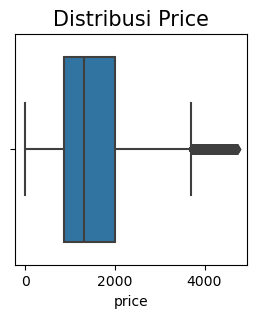

In [19]:
#Menampilkan boxplot setelah outliers price dibersihkan

plt.figure(figsize=(3,3))
sns.boxplot(x=airbnbBangkok['price'])
plt.title('Distribusi Price', size=15)
plt.show

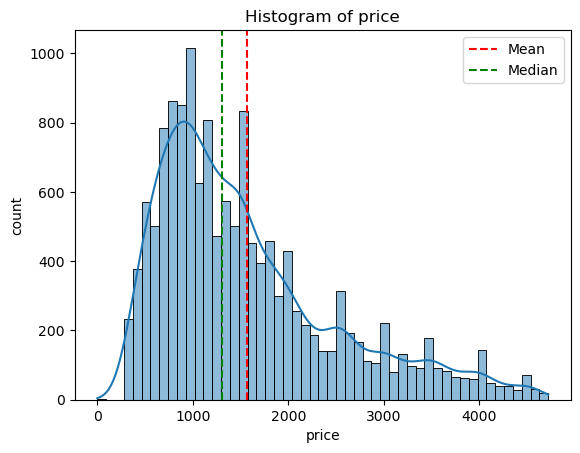

In [20]:
#Menampilkan histogram setelah outliers price dibersihkan


sns.histplot(airbnbBangkok['price'], kde = True)
plt.xlabel('price')
plt.ylabel('count')
plt.title('Histogram of price')

mean_price = airbnbBangkok['price'].mean()
median_price = airbnbBangkok['price'].median()

plt.axvline(mean_price, color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(median_price, color = 'green', linestyle = '--', label = 'Median')

plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

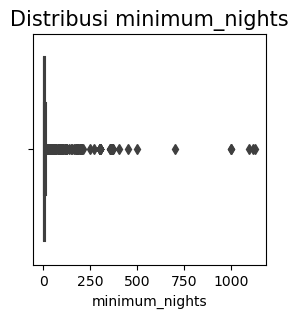

In [21]:
#Mengecek normalitas data pada kolom 'minimum_nights'

plt.figure(figsize=(3,3))
sns.boxplot(x=airbnbBangkok['minimum_nights'])
plt.title('Distribusi minimum_nights', size=15)
plt.show

Distribusi 'minimum_nights' terlihat sangat tidak normal (rightskewed) dan banyak outliers

In [22]:
#pengecekan outliers pada kolom 'minimum_nights'

airbnbBangkok.sort_values('minimum_nights', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0
7986,35165443,Wonderful apartment for you holiday in Thai,86991723,Yang,Bang Na,13.67260,100.60352,Entire home/apt,2000,1115,0,NaN,0.00,2,358,0
11524,49032568,Freehold Condo near Bangsue Grand Station,4661237,Chayanid,Bang Sue,13.80697,100.52362,Entire home/apt,554,1095,0,NaN,0.00,1,358,0
10153,41623113,blossom condo舒适双床房摩天轮夜市周边免费泳池健身房@Sathon surasa...,162537040,Songnya,Sathon,13.71195,100.52055,Entire home/apt,650,1000,2,2020-03-08,0.06,13,179,0
11243,45051929,Bellevue Boutique Bangkok | Airport Link HUA-MAK,165329146,Sataporn,Suanluang,13.73633,100.63836,Private room,1314,999,0,NaN,0.00,2,181,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9437,39925667,Sweet Breeze Double Bed,285546572,Riverview,Samphanthawong,13.73328,100.51308,Entire home/apt,3326,1,1,2021-08-19,0.06,21,64,0
9436,39925541,City Delight,285546572,Riverview,Samphanthawong,13.73328,100.51308,Entire home/apt,1463,1,0,NaN,0.00,21,0,0
9435,39925531,Urban Chic Twin Bed,285546572,Riverview,Samphanthawong,13.73328,100.51308,Entire home/apt,2165,1,0,NaN,0.00,21,0,0
9434,39925515,Dragon Move Twin Bed with Balcony,285546572,Riverview,Samphanthawong,13.73328,100.51308,Entire home/apt,2282,1,0,NaN,0.00,21,0,0


Hasil pengecekan outliers menunjukkan angka maximum dari 'minimum_nights' adalah 1125 hari atau 3 tahun untuk satu rumah. Ini adalah standar sewa/kontrak rumah yang wajar sehingga outliers dipandang tidak perlu dihilangkan

<function matplotlib.pyplot.show(close=None, block=None)>

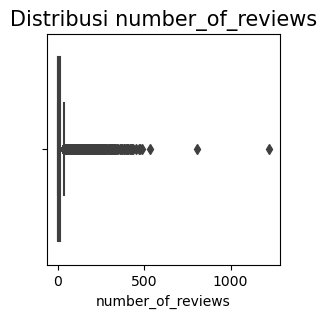

In [23]:
#Mengecek normalitas kolom 'number_of_reviews'

plt.figure(figsize=(3,3))
sns.boxplot(x=airbnbBangkok['number_of_reviews'])
plt.title('Distribusi number_of_reviews', size=15)
plt.show

Kolom  number_of_reviews terlihat banyak sekali outliers dan data juga tidak berdistribusi normal (rightskewed)

In [24]:
#pengecekan outliers pada kolom 'number_of_reviews'

airbnbBangkok.sort_values('number_of_reviews', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.77369,100.54079,Entire home/apt,1571,3,1224,2022-12-16,19.13,1,310,109
6586,31077175,FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE,158545122,Pailin,Lat Krabang,13.72132,100.76495,Private room,1032,1,807,2022-12-12,16.62,3,348,146
1470,9453790,37 Nature House: 10 mins to DMK Int'l Airport,35462876,Wuthiphon,Lak Si,13.87145,100.58039,Entire home/apt,1039,1,533,2022-12-04,6.22,9,346,18
905,5964843,The Mustang Nero/No.4 The Horse,30963587,Themustang,Khlong Toei,13.71143,100.59390,Hotel room,2329,1,486,2022-12-06,5.26,10,47,6
622,6013487,The Mustang Nero/No.3 The Wolf,30963587,Themustang,Khlong Toei,13.71286,100.59172,Hotel room,2329,1,477,2022-11-22,5.11,10,50,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,44598382,Glory Sukhumvit 2 bed 2 bath Asoke #Promphong ...,276180117,Annie,Vadhana,13.74171,100.56936,Entire home/apt,2200,1,0,NaN,0.00,2,0,0
11116,44579054,"Room-Pini, Room No.33, Deluxe Twin Beds",356123100,Room-Pini,Parthum Wan,13.73538,100.53833,Private room,2107,1,0,NaN,0.00,9,306,0
11115,44578966,"Room-Pini, Room No.32, Deluxe Room",356123100,Room-Pini,Parthum Wan,13.73350,100.54050,Private room,2064,1,0,NaN,0.00,9,323,0
11114,44578784,"Room-Pini, Room No.31, Deluxe Room",356123100,Room-Pini,Parthum Wan,13.73548,100.54051,Private room,2064,1,0,NaN,0.00,9,328,0


Angka tertinggi dari number_of_reviews adalah 1224 review atau 19 review rata-rata perbulan. Bila dibandingkan dengan lokasi yang ada di pusat kota dan harga yang murah kemungkinan jumlah review ini masuk akal shingga dipandang tidak perlu dihilangkan.

<function matplotlib.pyplot.show(close=None, block=None)>

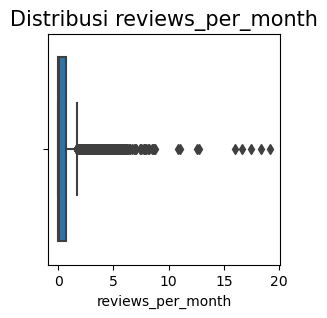

In [25]:
#Mengecek normalitas kolom 'reviews_per_month'

plt.figure(figsize=(3,3))
sns.boxplot(x=airbnbBangkok['reviews_per_month'])
plt.title('Distribusi reviews_per_month', size=15)
plt.show


In [26]:
#pengecekan outliers pada kolom 'reviews_per_month'

airbnbBangkok.sort_values('reviews_per_month', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.773690,100.540790,Entire home/apt,1571,3,1224,2022-12-16,19.13,1,310,109
11732,51673745,Siamese Sukhumvit 87-1BR Duplex near BTS On Nut,417308207,Siamese Sukhumvit 87,Phra Khanong,13.701551,100.603775,Private room,3461,1,263,2022-12-14,18.31,1,364,246
13177,656164225695350804,1 Bedroom Suite [Silom-Sathorn],340150263,Bandara,Bang Rak,13.725810,100.538228,Private room,3571,1,101,2022-12-14,17.41,18,304,101
6586,31077175,FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE,158545122,Pailin,Lat Krabang,13.721320,100.764950,Private room,1032,1,807,2022-12-12,16.62,3,348,146
15228,770846996579268639,1BR- BTS Ekamai 300m-Sky infinity Pool&Gym,106371215,Kk,Khlong Toei,13.716772,100.584955,Entire home/apt,2668,1,16,2022-12-26,16.00,4,154,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10874,43062804,Wireless road/Canal view/14th floor,342788480,Anas,Parthum Wan,13.747090,100.547730,Private room,3540,1,0,NaN,0.00,1,270,0
10873,43313603,"曼谷 Ideo new rama9,Loft设计 全景落地窗 配套齐全 机场快线 交通完善",342113311,George,Bang Kapi,13.765960,100.656250,Entire home/apt,733,90,0,NaN,0.00,40,332,0
10868,43059400,Thayarat Mansion,342764868,Phuwasith,Chatu Chak,13.836160,100.566820,Private room,1039,2,0,NaN,0.00,1,88,0
4570,23400673,Pratunam Prestige Condominium,172290581,R,Ratchathewi,13.750950,100.537270,Private room,2791,4,0,NaN,0.00,4,363,0


Mengikuti analisis pada data kolom 'number_of_reviews', maka outliers pada kolom 'reviews_per_month' juga dapat dianggap sebagai natural outliers sehingga tidak perlu dihilangkan.

<function matplotlib.pyplot.show(close=None, block=None)>

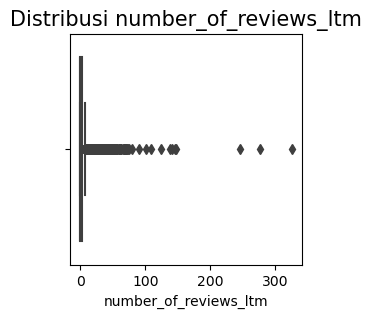

In [27]:
#Mengecek normalitas kolom 'number_of_reviews_ltm'

plt.figure(figsize=(3,3))
sns.boxplot(x=airbnbBangkok['number_of_reviews_ltm'])
plt.title('Distribusi number_of_reviews_ltm', size=15)
plt.show


In [28]:
#pengecekan outliers pada kolom 'number_of_reviews_ltm'

airbnbBangkok.sort_values('number_of_reviews_ltm', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5759,28684287,New* King size bed room - 5-min to BTS,33098670,Paw,Ratchathewi,13.762220,100.540410,Entire home/apt,1140,1,406,2022-12-26,7.83,4,343,325
375,3794264,Sitara Place Serviced Apartment and Hotel,19484732,Sitara,Din Daeng,13.764796,100.564781,Entire home/apt,990,1,302,2022-12-28,3.38,1,360,277
11732,51673745,Siamese Sukhumvit 87-1BR Duplex near BTS On Nut,417308207,Siamese Sukhumvit 87,Phra Khanong,13.701551,100.603775,Private room,3461,1,263,2022-12-14,18.31,1,364,246
3562,19126623,15min BKK Airport/Swimming Pool/Near Mall,128820736,The Cottage,Lat Krabang,13.721040,100.724510,Hotel room,1199,1,168,2022-12-26,2.51,4,356,147
6586,31077175,FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE,158545122,Pailin,Lat Krabang,13.721320,100.764950,Private room,1032,1,807,2022-12-12,16.62,3,348,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251,29862303,Beverly Bangkok Downtown - High Speed Internet,87678967,Karan,Vadhana,13.735250,100.568400,Entire home/apt,1800,3,6,2019-01-26,0.12,3,282,0
6252,30054293,"Luxury Condo, High-floor views, AWESOME LOCATION",9860919,Manita,Parthum Wan,13.744620,100.549200,Entire home/apt,1750,29,0,NaN,0.00,1,175,0
6256,30077127,Rama9/ Central/ Bangkok/ Good Location,226012526,Last,Huai Khwang,13.754440,100.575260,Entire home/apt,1800,2,1,2018-11-23,0.02,1,89,0
6260,30084020,Free airport transfer 2 way / 1 br / wifi / Pool,226048133,Best,Huai Khwang,13.776320,100.584110,Entire home/apt,1150,3,0,NaN,0.00,1,89,0


Dipandang tidak perlu menghilangkan outliers dengan alasan yang sama pada 'reviews_per_month' dan 'number_of_reviews'

<function matplotlib.pyplot.show(close=None, block=None)>

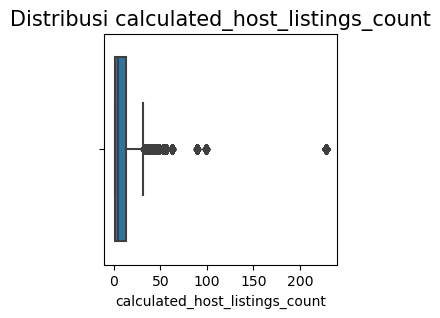

In [29]:
#Mengecek normalitas kolom 'calculated_host_listings_count'

plt.figure(figsize=(3,3))
sns.boxplot(x=airbnbBangkok['calculated_host_listings_count'])
plt.title('Distribusi calculated_host_listings_count', size=15)
plt.show


Distribusi data 'calculated_host_listings_count' terlihat tidak normal (right skewed) dan banyak outliers

In [30]:
#pengecekan outliers pada kolom 'calculated_host_listings_count'

airbnbBangkok.sort_values('calculated_host_listings_count', ascending=False)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11427,46452651,New! Gateway/ Bangkok University 1BR 2PPL near...,201677068,Curry,Khlong Toei,13.717660,100.586300,Entire home/apt,2099,1,18,2022-11-26,0.77,228,347,14
8474,36892921,30days! Sukhumvit NANA spacious 1BR near BTS ...,201677068,Curry,Ratchathewi,13.751010,100.556290,Entire home/apt,1466,3,37,2022-08-16,0.89,228,361,2
12662,604823265312303674,1BR Twin Suit 2ppl/Surasak BTS Sathorn/Pool /WIFI,201677068,Curry,Sathon,13.708960,100.520020,Entire home/apt,1320,1,5,2022-12-07,0.62,228,359,5
8617,37298481,New! La Chada Night Market studio 2PPL near MRT,201677068,Curry,Huai Khwang,13.772720,100.581130,Entire home/apt,1000,1,15,2020-02-27,0.37,228,0,0
8609,37543284,30days! AirportLink Sukhumvit NANA MaxValu 2BR...,201677068,Curry,Ratchathewi,13.749020,100.555810,Entire home/apt,3994,3,53,2022-12-06,1.29,228,349,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5750,28508739,Monlodge & Yoga Donmuang (Pink),214111993,อิสรีย์,Don Mueang,13.925380,100.584850,Private room,750,1,1,2018-12-31,0.02,1,365,0
5749,28504024,#4B# SIAM MBK PRATUNAM PLATINUM RATCHATHEWI BTS,12521344,Waratchachon,Ratchathewi,13.750000,100.534060,Entire home/apt,1090,2,26,2022-09-18,0.52,1,176,1
9818,40940606,Asoke Top view luxury&convenience condo.,52010396,Liz,Vadhana,13.740840,100.559240,Entire home/apt,1500,60,7,2022-11-30,0.20,1,133,4
5748,28503913,สะดวกสบายอพาร์ทเม้น 1 ห้องนอน,215147603,Martin,Phra Nakhon,13.760730,100.498720,Private room,2632,1,0,NaN,0.00,1,365,0


Kelihatannya outliers pada 'calculated_host_listings_count' yang menunjukkan jumlah properti yang diiklankan di airbnb masih dipandang wajar untuk pengusaha yang memang berbisnis menyewakan properti. Dengan demikian outliers tidak perlu dihilangkan.

<function matplotlib.pyplot.show(close=None, block=None)>

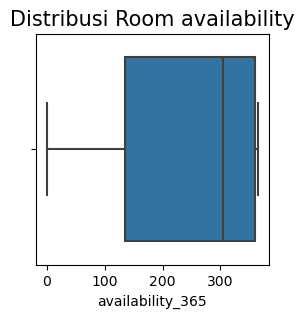

In [31]:
plt.figure(figsize=(3,3))
sns.boxplot(x=airbnbBangkok['availability_365'])
plt.title('Distribusi Room availability', size=15)
plt.show


Distribusi normalitas data menunjukkan data miring ke kiri (left skewed), namun tidak terlihat ada outliers

In [32]:
#pengecekan nilai maximum pada kolom 'availability_365'

airbnbBangkok.sort_values('availability_365', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.54082,Private room,1214,1,0,NaN,0.00,14,365,0
11108,44080790,คุ้มเกล้า ทีค ฮัท รีสอร์ต,353529412,Chansuay,Min Buri,13.804960,100.78119,Private room,990,1,0,NaN,0.00,1,365,0
11178,45335213,配备齐全的全新服务型公寓。,176656078,Tina,Bang Kapi,13.747410,100.60303,Entire home/apt,1666,1,0,NaN,0.00,3,365,0
11173,44253854,"Life@Ratchada-Suttisan 2Bedrooms 20,000Bth/month",323204011,Sasiwimol,Din Daeng,13.790120,100.57385,Private room,1000,120,0,NaN,0.00,1,365,0
11164,45325869,Carisma condo is in the center of Bangkok,86083884,Natty,Bang Khen,13.858220,100.63641,Private room,2000,1,0,NaN,0.00,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8677,37789826,"Bright & cosy apartment, high floor, river view",285980010,Arwut,Yan na wa,13.679080,100.52773,Entire home/apt,1500,1,1,2020-01-01,0.03,1,0,0
3742,20547545,Onnut - Gorgeous Studio Apartment near Sky Train,91235259,Manuel,Vadhana,13.718531,100.58802,Entire home/apt,780,28,19,2022-10-19,0.30,1,0,4
8700,37819871,New! La Chada Night Market studio 2PPL near MRT,201677068,Curry,Huai Khwang,13.766870,100.58670,Entire home/apt,1000,1,7,2020-02-10,0.17,228,0,0
8708,37830031,State tower/Si lom,20272648,Grischtana,Bang Rak,13.724820,100.52611,Entire home/apt,3117,1,1,2019-12-22,0.03,2,0,0


 'availability_365' menunjukkan ketersediaan penyewaan untuk hari ke depan. Angka ketersediaan maximum 365 hari ke depan menunjukkan hunian tersebut sepi peminat.

MENAMPILKAN INFO DATA YANG DITELAH BERSIH

In [33]:
#Data understanding: shape

print(f'Jumlah baris dan kolom = {airbnbBangkok.shape}')

Jumlah baris dan kolom = (14451, 16)


In [34]:
#Data understanding: info

print(f'Info data airbnbBangkok: ')
airbnbBangkok.info()

Info data airbnbBangkok: 
<class 'pandas.core.frame.DataFrame'>
Index: 14451 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14451 non-null  int64  
 1   name                            14444 non-null  object 
 2   host_id                         14451 non-null  int64  
 3   host_name                       14450 non-null  object 
 4   neighbourhood                   14451 non-null  object 
 5   latitude                        14451 non-null  float64
 6   longitude                       14451 non-null  float64
 7   room_type                       14451 non-null  object 
 8   price                           14451 non-null  int64  
 9   minimum_nights                  14451 non-null  int64  
 10  number_of_reviews               14451 non-null  int64  
 11  last_review                     9303 non-null   object 
 12  reviews_per

In [35]:
#Data understanding: describe() data numerik
#Data numerik 'unnamed:', 'id', 'host_id', 'latitude', 'longitude' tidak di describe karena merupakan data nominal.

airbnbBangkok[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,14451.0,1563.612553,942.617290,0.0,861.5,1300.0,2000.00,4720.00
minimum_nights,14451.0,15.382257,49.161875,1.0,1.0,1.0,7.00,1125.00
number_of_reviews,14451.0,17.089959,41.491925,0.0,0.0,2.0,14.00,1224.00
reviews_per_month,14451.0,0.524174,0.959992,0.0,0.0,0.1,0.69,19.13
calculated_host_listings_count,14451.0,14.045464,30.968935,1.0,1.0,4.0,13.00,228.00
availability_365,14451.0,243.197218,125.484660,0.0,136.0,305.0,360.00,365.00
number_of_reviews_ltm,14451.0,3.517404,8.981374,0.0,0.0,0.0,3.00,325.00


In [36]:
#Data understanding: describe data 'object'

airbnbBangkok.describe(include='object').T

,count,unique,top,freq
name,14444,13473,New! La Chada Night Market studio 2PPL near MRT,45
host_name,14450,4980,Curry,221
neighbourhood,14451,50,Khlong Toei,1887
room_type,14451,4,Entire home/apt,8107
last_review,9303,1611,2022-12-14,178


# **C. Analis Data Untuk Membantu Investor Dalam Penentuan Lokasi Investasi Properti**

Analisis akan didasarkan pada empat hal yaitu:
1. klasifikasi daerah berdasarkan tingkat harga sewa
1. klasifikasi daerah berdasarkan tingkat rata-rata listing airbnb
1. klasifikasi daerah berdasarkan occupancy rate 
1. klasifikasi daerah berdasarkan popularitas review penyewa


## **C.1. Analisis Klasifikasi Neighbourhood Berdasarkan Harga Sewa**

In [37]:
##bagaimana klasifikasi daerah berdasarkan tingkat harga sewa

neighbourPrice = airbnbBangkok.groupby(['neighbourhood'])
neighbourPrice1=neighbourPrice['price'].median().sort_values(ascending=False).reset_index()
neighbourPrice1. head()


,neighbourhood,price
0,Parthum Wan,1946.5
1,Bang Rak,1753.5
2,Vadhana,1732.0
3,Samphanthawong,1714.0
4,Khlong Toei,1581.0


In [38]:
#Menentukan kategorisasi rata-rata harga sewa

neighbourPrice1['price'].describe()

count      50.00000
mean     1129.57000
std       282.64218
min       658.00000
25%       913.62500
50%      1034.50000
75%      1296.50000
max      1946.50000
Name: price, dtype: float64

Kategorisasi akan ditentukan berdasarkan rata-rata yang dibagi berdasarkan quartil.
Dari sini kita tentukan bahwa:
* Harga sewa mahal: 1296.5 > dan <= 1946.5
* Harga sewa sedang: 913.625 > dan <= 1296.50000
* Harga sewa murah:  <=913.625 

In [39]:
#Buat kategorisasi harga sewa per lokasi

neighbourPrice1['harga_sewa'] = neighbourPrice1['price'].apply(lambda x: 'mahal' if x >  1296.5   else 'sedang' if x > 913.625 and x <= 1296.5 else 'murah')
neighbourPrice1.head()

,neighbourhood,price,harga_sewa
0,Parthum Wan,1946.5,mahal
1,Bang Rak,1753.5,mahal
2,Vadhana,1732.0,mahal
3,Samphanthawong,1714.0,mahal
4,Khlong Toei,1581.0,mahal


In [40]:
#Tampilkan kategorsasi per jumlah lokasi
neighbourPrice2 = neighbourPrice1.groupby(['harga_sewa'])
neighbourPrice3 = neighbourPrice2[['harga_sewa']].value_counts().reset_index()
neighbourPrice3

,harga_sewa,count
0,mahal,13
1,murah,13
2,sedang,24


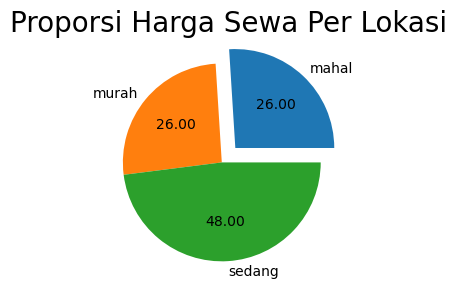

In [41]:
#Melihat proporsi harga sewa perlokasi

plt.figure(figsize=(3,3))
plt.pie(neighbourPrice3['count'],
        labels=neighbourPrice3['harga_sewa'],
        autopct='%.2f',
        explode=(0.2,0,0))
plt.axis('equal')
plt.title('Proporsi Harga Sewa Per Lokasi', size=20)
plt.show()

Text(0.5, 1.0, 'Rata-Rata Harga Sewa  per Lokasi (Semakin Tinggi Semakin Baik)')

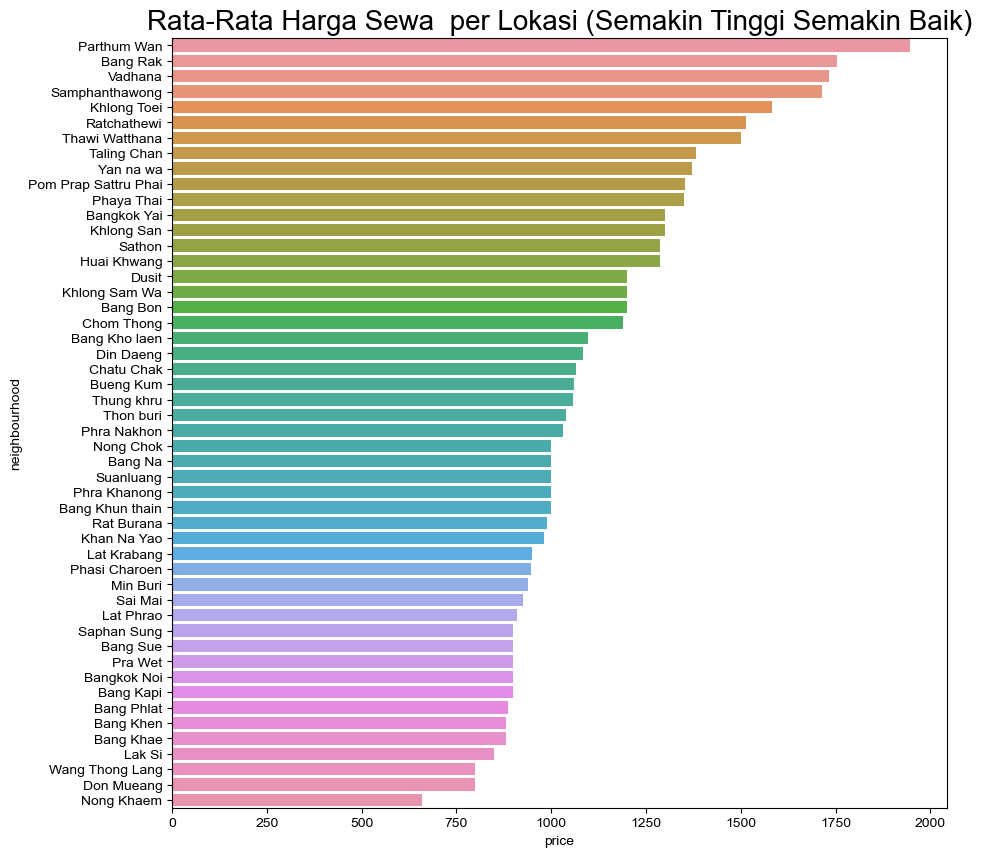

In [42]:
#Membuat barplot rata-rata (median) 'price  per 'neighborhood'

plt.figure(figsize=(10,10))
sns.barplot(data=neighbourPrice1, y='neighbourhood', x='price')
sns.set_style('whitegrid')
plt.title("Rata-Rata Harga Sewa  per Lokasi (Semakin Tinggi Semakin Baik)",size=20)

## **C.2. Analisis Klasifikasi Neighbourhood Berdasarkan Tingkat Listing Sewa**

In [43]:
#  klasifikasi daerah berdasarkan tingkat rata-rata listing airbnb

neighbour_count = airbnbBangkok['neighbourhood'].value_counts()
neighbour_count1 = neighbour_count.reset_index()
neighbour_count1.head()


,neighbourhood,count
0,Khlong Toei,1887
1,Vadhana,1770
2,Ratchathewi,1059
3,Huai Khwang,1031
4,Sathon,762


In [44]:
#Menentukan kategorisasi tingkat listing per lokasi

neighbour_count1['count'].describe().reset_index()

,index,count
0,count,50.000000
1,mean,289.020000
2,std,406.288301
3,min,5.000000
4,25%,51.000000
5,50%,127.500000
6,75%,370.750000
7,max,1887.000000


Kategorisasi akan ditentukan berdasarkan rata-rata yang dibagi berdasarkan quartil.
Dari sini kita tentukan bahwa:
* Tingkat listing tinggi: 370.75 > dan <= 1887.00
* Tingkat listing sedang: 51.00 > dan <= 370.75
* Tingkat listing rendah:  <=51.00 

In [45]:
#Buat kategorisasi tingkat listing per lokasi

neighbour_count1['tingkat_listing'] = neighbour_count1['count'].apply(lambda x: 'tinggi' if x >  370.75   else 'sedang' if x > 51.00 and x <= 370.75 else 'rendah')
neighbour_count1.head()

,neighbourhood,count,tingkat_listing
0,Khlong Toei,1887,tinggi
1,Vadhana,1770,tinggi
2,Ratchathewi,1059,tinggi
3,Huai Khwang,1031,tinggi
4,Sathon,762,tinggi


In [46]:
#Tampilkan kategorsasi per jumlah lokasi
neighbour_count2 = neighbour_count1.groupby(['tingkat_listing'])
neighbour_count3 = neighbour_count2[['tingkat_listing']].value_counts().reset_index()
neighbour_count3

,tingkat_listing,count
0,rendah,14
1,sedang,23
2,tinggi,13


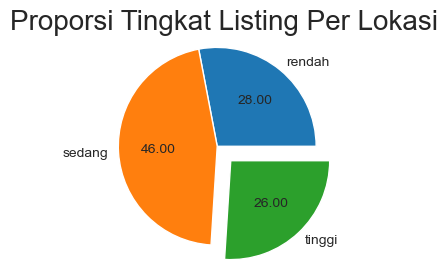

In [47]:
#Melihat proporsi tingkat listing perlokasi

plt.figure(figsize=(3,3))
plt.pie(neighbour_count3['count'],
        labels=neighbour_count3['tingkat_listing'],
        autopct='%.2f',
        explode=(0,0,0.2))
plt.axis('equal')
plt.title('Proporsi Tingkat Listing Per Lokasi', size=20)
plt.show()

Text(0.5, 1.0, 'Jumlah Listing Properti Per-Neighborhood (Semakin Tinggi Semakin Baik)')

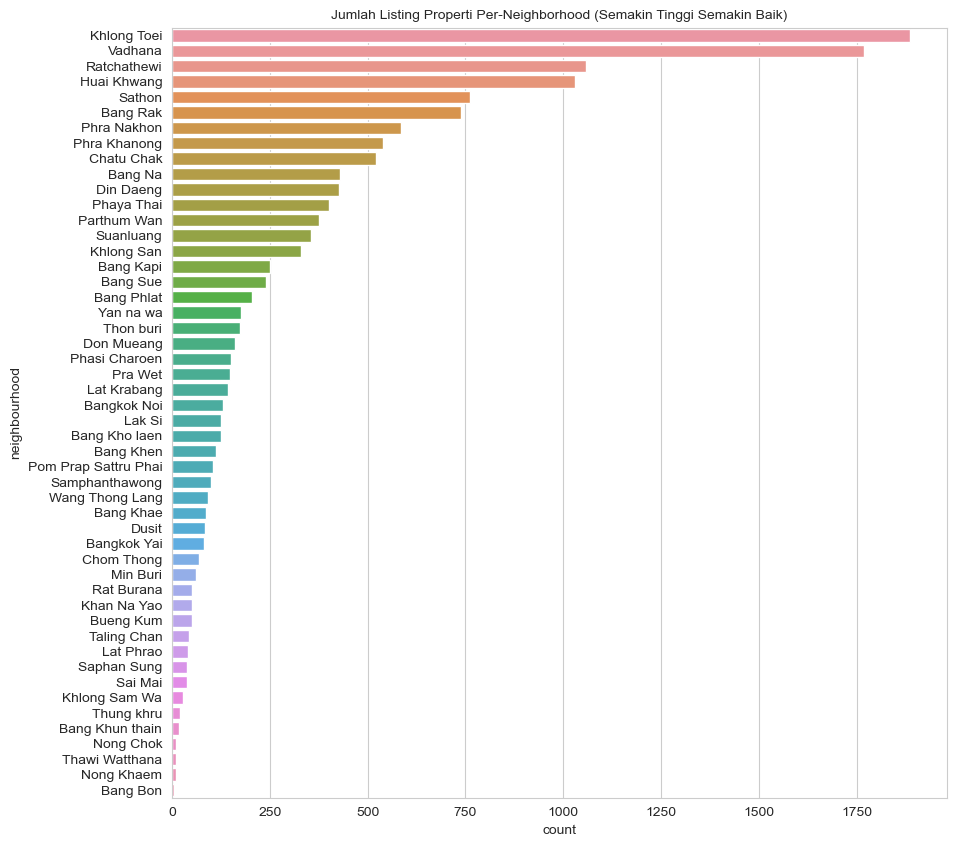

In [48]:
###Membuat barplot jumlah Listing Per-Neighborhood

plt.figure(figsize=(10,10))
sns.barplot(data=neighbour_count1, y='neighbourhood', x='count')
sns.set_style('whitegrid')
plt.title('Jumlah Listing Properti Per-Neighborhood (Semakin Tinggi Semakin Baik)',size=10)

## **C.3. Analisis Klasifikasi Neighbourhood Berdasarkan Tingkat Ketersediaan Sewa Properti Ke Depan**

In [49]:
#melihat rata-rata tingkat pemesanan dilihat dari melalui ketersediaan kamar 365 hari ke depan per neighbourhood

neighbourAvail= airbnbBangkok.groupby(['neighbourhood'])
neighbourAvail1=neighbourAvail['availability_365'].median().sort_values(ascending=True).reset_index()
neighbourAvail1.head(10)


,neighbourhood,availability_365
0,Huai Khwang,180.0
1,Nong Chok,180.0
2,Wang Thong Lang,210.0
3,Vadhana,237.5
4,Bang Sue,240.0
5,Thawi Watthana,242.0
6,Khan Na Yao,242.0
7,Khlong Toei,255.0
8,Phra Khanong,271.0
9,Thon buri,285.0


Ketersediaan properti dalam 365 hari ke depan yang semakin rendah menunjukkan tingkat booking yang semakin tinggi

In [50]:
#Menentukan kategorisasi tingkat pemesanan per lokasi

neighbourAvail1['availability_365'].describe().reset_index()

,index,availability_365
0,count,50.000000
1,mean,316.060000
2,std,48.608352
3,min,180.000000
4,25%,298.500000
5,50%,329.000000
6,75%,353.750000
7,max,365.000000


Kategorisasi akan ditentukan berdasarkan rata-rata yang dibagi berdasarkan quartil.
Dari sini kita tentukan bahwa:
* Tingkat listing rendah: 353.750000 > dan <= 365.000000
* Tingkat listing sedang: 298.500000 > dan <= 353.750000
* Tingkat listing tinggi:  <=298.500000 

In [51]:
#Buat kategorisasi harga sewa per lokasi

neighbourAvail1['tingkat_booking'] = neighbourAvail1['availability_365'].apply(lambda x: 'rendah' if x >  353.750000   else 'sedang' if x > 298.500000 and x <= 353.750000 else 'tinggi')
neighbourAvail1.head()

,neighbourhood,availability_365,tingkat_booking
0,Huai Khwang,180.0,tinggi
1,Nong Chok,180.0,tinggi
2,Wang Thong Lang,210.0,tinggi
3,Vadhana,237.5,tinggi
4,Bang Sue,240.0,tinggi


In [52]:
#Tampilkan kategorsasi per jumlah lokasi
neighbourAvail2 = neighbourAvail1.groupby(['tingkat_booking'])
neighbourAvail3 = neighbourAvail2[['tingkat_booking']].value_counts().reset_index()
neighbourAvail3

,tingkat_booking,count
0,rendah,13
1,sedang,24
2,tinggi,13


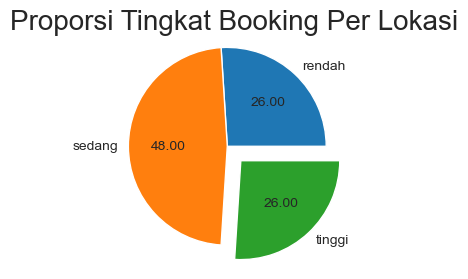

In [53]:
#Melihat proporsi tingkat booking

plt.figure(figsize=(3,3))
plt.pie(neighbourAvail3['count'],
        labels=neighbourAvail3['tingkat_booking'],
        autopct='%.2f',
        explode=(0,0,0.2))
plt.axis('equal')
plt.title('Proporsi Tingkat Booking Per Lokasi', size=20)
plt.show()

Text(0.5, 1.0, 'Rata-Rata Tingkat Availabilitas Properti Per Neighbourhood (Semakin Rendah Semakin Baik)')

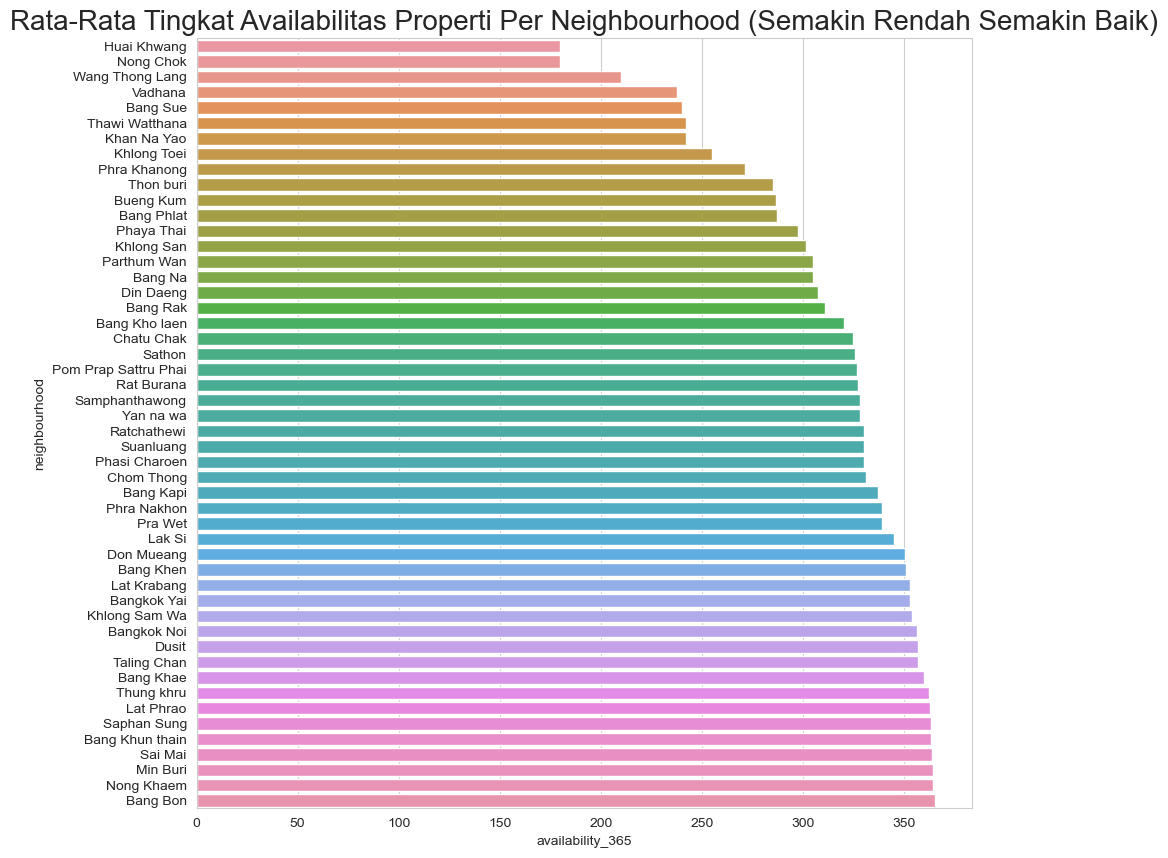

In [54]:
#Membuat barplot rata-rata tingkat pemesanan dilihat dari melalui ketersediaan kamar 365 hari ke depan per neighbourhood

plt.figure(figsize=(10,10))
sns.barplot(data=neighbourAvail1, y='neighbourhood', x='availability_365')
sns.set_style('whitegrid')
plt.title("Rata-Rata Tingkat Availabilitas Properti Per Neighbourhood (Semakin Rendah Semakin Baik)",size=20)

## **C.4. Analisis Klasifikasi Jumlah Review Berdasarkan Lokasi**

In [55]:
#melihat rata-rata review listing per neighbourhood

neighbourReview= airbnbBangkok.groupby(['neighbourhood'])
neighbourReview1=neighbourReview['number_of_reviews'].median().sort_values(ascending=False).reset_index()
neighbourReview1.head()

,neighbourhood,number_of_reviews
0,Khlong Toei,6.0
1,Pom Prap Sattru Phai,5.5
2,Phaya Thai,4.0
3,Bang Rak,4.0
4,Sathon,4.0


In [56]:
#Menentukan kategorisasi tingkat listing per lokasi

neighbourReview1['number_of_reviews'].describe().reset_index()

,index,number_of_reviews
0,count,50.000000
1,mean,1.280000
2,std,1.488596
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,2.000000
7,max,6.000000


Kategorisasi akan ditentukan berdasarkan rata-rata yang dibagi berdasarkan quartil.
Dari sini kita tentukan bahwa:
* Tingkat review tinggi: 2.000000 > dan <= 6.000000
* Tingkat review sedang: 1.000000 > dan <= 2.000000
* Tingkat review tidak ada:  <=1.000000 

In [57]:
neighbourReview1['tingkat_review'] = neighbourReview1['number_of_reviews'].apply(lambda x: 'tinggi' if x >  2.000000   else 'sedang' if x >= 1.000000 and x <= 2.000000 else 'rendah' if  x > 0.000000 and x <= 1.000000 else 'tidak ada')
neighbourReview1.head()

,neighbourhood,number_of_reviews,tingkat_review
0,Khlong Toei,6.0,tinggi
1,Pom Prap Sattru Phai,5.5,tinggi
2,Phaya Thai,4.0,tinggi
3,Bang Rak,4.0,tinggi
4,Sathon,4.0,tinggi


In [58]:
#Tampilkan kategorsasi per tingkat review
neighbourReview2 = neighbourReview1.groupby(['tingkat_review'])
neighbourReview3 = neighbourReview2[['tingkat_review']].value_counts().reset_index()
neighbourReview3

,tingkat_review,count
0,rendah,1
1,sedang,22
2,tidak ada,20
3,tinggi,7


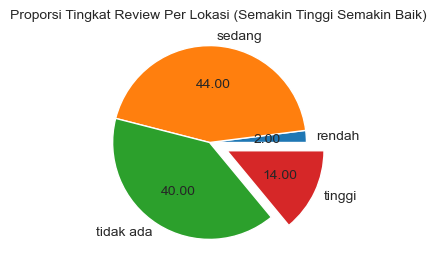

In [59]:
#Melihat proporsi tingkat review

plt.figure(figsize=(3,3))
plt.pie(neighbourReview3['count'],
        labels=neighbourReview3['tingkat_review'],
        autopct='%.2f',
        explode=(0,0,0,0.2))
plt.axis('equal')
plt.title('Proporsi Tingkat Review Per Lokasi (Semakin Tinggi Semakin Baik)', size=10)
plt.show()

Text(0.5, 1.0, 'Rata-Rata Review Per Neighbourhood (Semakin Tinggi Semakin Baik)')

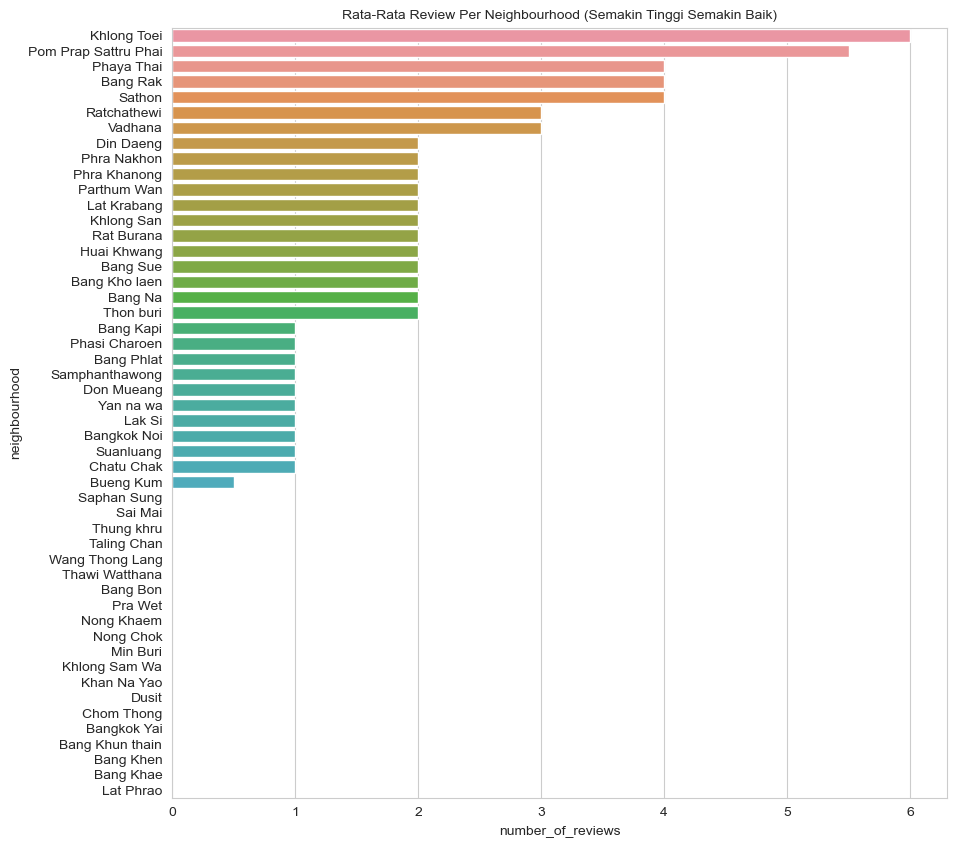

In [60]:
#melihat rata-rata review per neighbourhood

plt.figure(figsize=(10,10))
sns.barplot(data=neighbourReview1, y='neighbourhood', x='number_of_reviews')
sns.set_style('whitegrid')
plt.title("Rata-Rata Review Per Neighbourhood (Semakin Tinggi Semakin Baik)",size=10)

In [61]:
#melihat rata-rata review per neighbourhood satu tahun terakhir

neighbourReviewLtm= airbnbBangkok.groupby(['neighbourhood'])
neighbourReviewLtm1=neighbourReview['number_of_reviews_ltm'].median().sort_values(ascending=False).reset_index()
neighbourReviewLtm1.head(5)

,neighbourhood,number_of_reviews_ltm
0,Khlong Toei,2.0
1,Vadhana,1.0
2,Parthum Wan,1.0
3,Sathon,1.0
4,Bang Bon,0.0


## **C.5. Menggabungkan Hasil Analisis 1 sd 4 Untuk Menentukan Lokasi Yang Paling Layak Investasi Penyewaan Properti AirBNB**

In [62]:
join1 = pd.merge(neighbourPrice1, neighbour_count1, on= 'neighbourhood')
join1.head()

,neighbourhood,price,harga_sewa,count,tingkat_listing
0,Parthum Wan,1946.5,mahal,376,tinggi
1,Bang Rak,1753.5,mahal,738,tinggi
2,Vadhana,1732.0,mahal,1770,tinggi
3,Samphanthawong,1714.0,mahal,99,sedang
4,Khlong Toei,1581.0,mahal,1887,tinggi


In [63]:
join2 = pd.merge(join1, neighbourAvail1, on= 'neighbourhood')
join2.head()

,neighbourhood,price,harga_sewa,count,tingkat_listing,availability_365,tingkat_booking
0,Parthum Wan,1946.5,mahal,376,tinggi,305.0,sedang
1,Bang Rak,1753.5,mahal,738,tinggi,311.0,sedang
2,Vadhana,1732.0,mahal,1770,tinggi,237.5,tinggi
3,Samphanthawong,1714.0,mahal,99,sedang,328.0,sedang
4,Khlong Toei,1581.0,mahal,1887,tinggi,255.0,tinggi


In [64]:
join3 = pd.merge(join2, neighbourReview1, on= 'neighbourhood')
join3.head()

,neighbourhood,price,harga_sewa,count,tingkat_listing,availability_365,tingkat_booking,number_of_reviews,tingkat_review
0,Parthum Wan,1946.5,mahal,376,tinggi,305.0,sedang,2.0,sedang
1,Bang Rak,1753.5,mahal,738,tinggi,311.0,sedang,4.0,tinggi
2,Vadhana,1732.0,mahal,1770,tinggi,237.5,tinggi,3.0,tinggi
3,Samphanthawong,1714.0,mahal,99,sedang,328.0,sedang,1.0,sedang
4,Khlong Toei,1581.0,mahal,1887,tinggi,255.0,tinggi,6.0,tinggi


In [65]:
join3.insert(9, column= 'total_skor2', value=join3['price']+join3['count']+join3['number_of_reviews']-join3['availability_365'])

In [66]:
join3.sort_values(by='total_skor2', ascending=False).head(6)

,neighbourhood,price,harga_sewa,count,tingkat_listing,availability_365,tingkat_booking,number_of_reviews,tingkat_review,total_skor2
2,Vadhana,1732.0,mahal,1770,tinggi,237.5,tinggi,3.0,tinggi,3267.5
4,Khlong Toei,1581.0,mahal,1887,tinggi,255.0,tinggi,6.0,tinggi,3219.0
5,Ratchathewi,1514.0,mahal,1059,tinggi,330.0,sedang,3.0,tinggi,2246.0
1,Bang Rak,1753.5,mahal,738,tinggi,311.0,sedang,4.0,tinggi,2184.5
14,Huai Khwang,1286.0,sedang,1031,tinggi,180.0,tinggi,2.0,sedang,2139.0
0,Parthum Wan,1946.5,mahal,376,tinggi,305.0,sedang,2.0,sedang,2019.5


## **C.6. Insight Dalam Penentuan Lokasi Investasi:**

Dari analisis data AirBNB no. 1 sampai dengan 4 terlihat bahwa ada dua lokasi neighbourhood di Bangkok yang paling layak untuk investasi penyewaan properti yaitu: 
1. Vadhana (skor total = 3267.5) tertinggi
1. KHLONG TEI (skor total = 3219.0)

VADHANA (wiki):
* Distrik komersial
* Lokasi kondo & hotel
* Lokasi shoping
* Hospital internasional
* Expat & embassy
* Higher education
* Publik Transport

KHLONG TOE (wiki):
* Sea Port
* Entertainment 
* Lokasi shoping
* Embassy
* Publik Transport
* Memiliki daerah slum (yang dapat dikembangkan)


In [67]:
koorBangkokDist = pd.read_excel('/Users/andreardi/Desktop/Capstone Modul 2/bangkok_neibourhood_coord .xlsx')

joinKoord1 = pd.merge(join2, koorBangkokDist, on= 'neighbourhood')

In [68]:
#Menampilkan peta per neighbourhood

bangkokNeighbourCoord = r'/Users/andreardi/Desktop/Capstone Modul 2/neighbourhoods.geojson'
joinKoord1

bangkokLoc = (13.7563, 100.5018)
bangkokMap = folium.Map(location=bangkokLoc, zoom_start=12)
folium.Choropleth(geo_data=bangkokNeighbourCoord, data=neighbourPrice1, columns=['neighbourhood', 'price'], key_on='properties.neighbourhood', fill_color='YlOrRd', fill_opacity=0.7,line_opacity=0.2,legend_name='Price Per Neighbourhood').add_to(bangkokMap)

for i in range(0,len(joinKoord1)):
   folium.Marker(location=[joinKoord1.iloc[i]['Latitude'], joinKoord1.iloc[i]['Longitude']],tooltip=joinKoord1.iloc[i]['neighbourhood'], popup=joinKoord1.iloc[i][['price','harga_sewa','tingkat_listing', 'tingkat_booking']], icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: blue">{joinKoord1.iloc[i]['neighbourhood']}</div>""")
).add_to(bangkokMap)

bangkokMap

# **D. Analisis Strategi Investasi Investor**

Ada empat strategi yang akan direkomendasi kepada investor, yaitu:
1. strategi harga 
1. strategi type properti yang disewakan
1. streategi kompetisi 


## **D.1. Strategi Harga**

Untuk menentukan strategi harga yang paling tepat harus dipastikan terlebih dahulu faktor-faktor yang akan berkorelasi dengan harga sewa

Analisis Faktor-Faktor yang akan berkorelasi dengan  harga sewa (kuantitatif), yaitu:
* neighbourhood (kualitatif): menggunakan uji F anova
* room_type (kualitatif): menggunakan uji F anova
* number_of_reviews (kuantitatif): menggunakan scatter plot dan korelasi spearman
* availability_365 (kuantitatif): menggunakan scatter plot dan korelasi spearman

# D.1.1. Analisis Korelasi Faktor Neighbourhood Dengan Harga Sewa

Analisis korelasi dengan menggunakan One Way Anova

One Way Anova digunakan untuk menggambarkan korelasi antara variabel 'neighbourhood' yang bertipe kategorikal dengan variabel 'price' yang bertipe numerikal


In [69]:
# Grupby neighbourhood terhadap harga sewa

neighbourGroupPrice = airbnbBangkok.groupby('neighbourhood')['price'].apply(list)
neighbourGroupPrice.head()

neighbourhood
Bang Bon                              [2632, 1200, 790, 2000, 900]
Bang Kapi        [800, 1905, 1190, 1316, 519, 1905, 1039, 658, ...
Bang Khae        [550, 737, 495, 360, 922, 771, 1000, 445, 450,...
Bang Khen        [1200, 866, 1500, 685, 1500, 491, 450, 1500, 9...
Bang Kho laen    [1000, 890, 980, 700, 831, 790, 720, 890, 1211...
Name: price, dtype: object

Hipotesis:

H0: tidak ada korelasi antara neighbourhood dan price

Ha: terdapat korelasi antara neighbourhood dan price

H0 akan diterima bila P-Value > 0.05

In [70]:
#Anova test

anovaNeighbourPrice = f_oneway(*neighbourGroupPrice)
print('P-Value untuk Anova adalah: ', anovaNeighbourPrice[1])

if (anovaNeighbourPrice[1]>0.05):
    print('Hasil tes anova > 0.05, H0 diterima, Tidak ada korelasi antara neighbourhood dengan price')
else:
    print('Hasil tes anova < 0.05, H0 ditolak,  ada korelasi antara neighbourhood dengan price')

P-Value untuk Anova adalah:  2.544038457484147e-256
Hasil tes anova < 0.05, H0 ditolak,  ada korelasi antara neighbourhood dengan price


# D.1.2. Analisis Korelasi Faktor Room Type Terhadap Harga Sewa

Analisis korelasi dengan menggunakan One Way Anova

One Way Anova digunakan untuk menggambarkan korelasi antara variabel 'room_type' yang bertipe kategorikal dengan variabel 'price' yang bertipe numerikal


In [71]:
# Grupby room type terhadap harga sewa

neighbourGroupPrice = airbnbBangkok.groupby('room_type')['price'].apply(list)
neighbourGroupPrice.head()

room_type
Entire home/apt    [1905, 1000, 1461, 1558, 1893, 910, 1400, 1577...
Hotel room         [1862, 1558, 859, 3910, 650, 2329, 2000, 1980,...
Private room       [1316, 800, 1286, 1905, 1558, 700, 1150, 4156,...
Shared room        [350, 330, 866, 712, 400, 456, 490, 450, 496, ...
Name: price, dtype: object

Hipotesis:

H0: tidak ada korelasi antara room type dan price

Ha: terdapat korelasi antara room type dan price

H0 akan diterima bila P-Value > 0.05

In [72]:
#Anova test

anovaNeighbourPrice = f_oneway(*neighbourGroupPrice)
print('P-Value untuk Anova adalah: ', anovaNeighbourPrice[1])

if (anovaNeighbourPrice[1]>0.05):
    print('Hasil tes anova > 0.05, H0 diterima, Tidak ada korelasi antara room type dengan price')
else:
    print('Hasil tes anova < 0.05, H0 ditolak,  ada korelasi antara room type dengan price')

P-Value untuk Anova adalah:  1.4136608651246245e-178
Hasil tes anova < 0.05, H0 ditolak,  ada korelasi antara room type dengan price


# D.1.3. Analisis Korelasi Faktor Number of Reviews Terhadap Harga Sewa

Analisis korelasi dengan menggunakan korelasi Spearman

Korelasi Spearman digunakan untuk menggambarkan korelasi antara variabel 'number_of_reviews' yang bertipe numerikal dan berdistribusi tidak normal dengan variabel 'price' yang bertipe numerikal

Namun sebelumnya perlu visualisasikan korelasi keduanya melalui scatter plot.


Text(0.5, 1.0, 'Korelasi Faktor Number of Reviews Terhadap Harga')

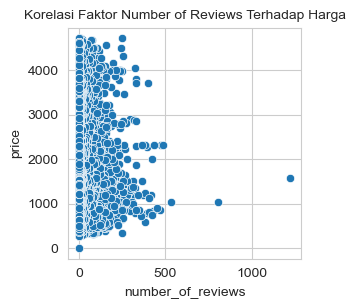

In [73]:
#Analisis Pengaruh faktor number_of_reviews terhadap harga sewa Menggunakan Scatter Plot

plt.figure(figsize=(3,3))
sns.scatterplot(data=airbnbBangkok, y='price', x='number_of_reviews')
sns.set_style('whitegrid')
plt.title('Korelasi Faktor Number of Reviews Terhadap Harga',size=10)

Scatter Plot tidak menggambarkan pola korelasi yang jelas antara number of reviews dengan price sehingga perlu dilihat lebih lanjut dengan analisis korelasi Spearman.

In [74]:
#Analisis Spearman dalam menganalisis korelasi antara number of reviews dengan price

spearmanRev = spearmanr(airbnbBangkok['number_of_reviews'], airbnbBangkok['price'])
print('Spearman correlation coefficient: ', spearmanRev[1])

if (spearmanRev[1]>0.05):
    print('Hasil tes spearman > 0.05, H0 diterima, Tidak ada korelasi antara number of reviews dengan price')
else:
    print('Hasil tes spearman <= 0.05, H0 ditolak,  ada korelasi antara number of reviews dengan price')

Spearman correlation coefficient:  0.17255363952898717
Hasil tes spearman > 0.05, H0 diterima, Tidak ada korelasi antara number of reviews dengan price


# D.1.4. Analisis Korelasi Faktor Room Availability dengan Harga Sewa

Analisis pengaruh dengan menggunakan korelasi Spearman

Korelasi Spearman digunakan untuk menggambarkan korelasi antara variabel 'availability_365' yang bertipe numerikal dan berdistribusi tidak normal dengan variabel 'price' yang bertipe numerikal

Namun sebelumnya perlu dilihat dulu secara visual korelasi keduanya melalui scatter plot


Text(0.5, 1.0, 'Korelasi Faktor Availability Terhadap Harga')

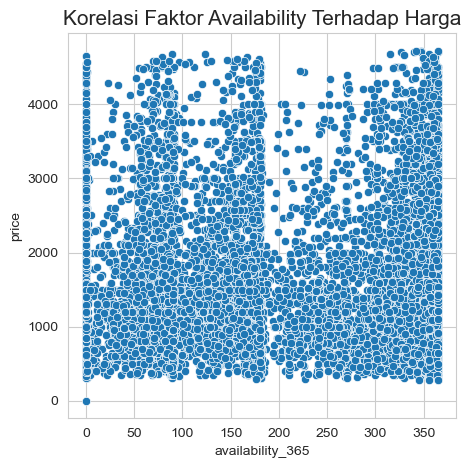

In [75]:
#Korelasi faktor availability terhadap price dilihat melalui scatterplot

plt.figure(figsize=(5,5))
sns.scatterplot(data=airbnbBangkok, y='price', x='availability_365')
sns.set_style('whitegrid')
plt.title('Korelasi Faktor Availability Terhadap Harga',size=15)

Tidak terlihat pola korelasi yang jelas di antara room availability dengan harga. Untuk itu perlu dilihat lebih mendalam melalui korelasi Spearman.

In [76]:
#Analisis Spearman dalam menganalisis korelasi antara number of reviews dengan price

spearmanAv = spearmanr(airbnbBangkok['availability_365'], airbnbBangkok['price'])
print('Spearman correlation coefficient: ', spearmanAv[1])

if (spearmanAv[1] > 0.05):
    print('Hasil tes spearman > 0.05, H0 diterima, Tidak ada korelasi antara availability dengan price')
else:
    print('Hasil tes spearman <= 0.05, H0 ditolak,  ada korelasi antara availability dengan price')

Spearman correlation coefficient:  0.0009952131842108308
Hasil tes spearman <= 0.05, H0 ditolak,  ada korelasi antara availability dengan price


## **D.1.5. INSIGHT STRATEGI PRICING INVESTOR DALAM PENENTUAN HARGA SEWA**

Patokan dalam penentuan harga sewa:
1. lokasi
1. tipe properti
1. tingkat booking (perhatikan season)

Untuk penentuan harga di Vadhana berkisar 1.732 THB

Sedangkan untuk Khlong Toei berkisar 1.581 THB

## **D.2. Strategi Tipe Properti Yang Akan Ditawarkan**

In [77]:
#Menghitung jumlah (count) room_type 

roomType = airbnbBangkok.groupby(['room_type'])
roomType1 = airbnbBangkok['room_type'].value_counts().reset_index()
roomType1

,room_type,count
0,Entire home/apt,8107
1,Private room,5281
2,Hotel room,554
3,Shared room,509


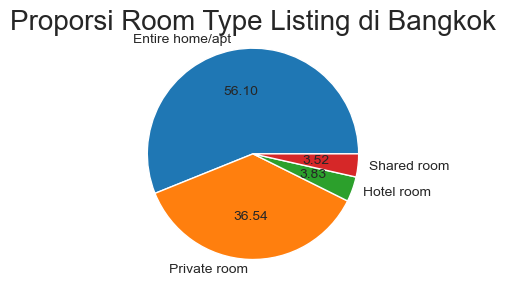

In [78]:
#Melihat proporsi room type

plt.figure(figsize=(3,3))
plt.pie(roomType1['count'],
        labels=roomType1['room_type'],
        autopct='%.2f',
        explode=(0,0,0,0))
plt.axis('equal')
plt.title('Proporsi Room Type Listing di Bangkok', size=20)
plt.show()

In [79]:
#Buat crosstab neighbourhood dan room type

roomNeigh = pd.crosstab(airbnbBangkok['neighbourhood'], airbnbBangkok['room_type'])
roomNeigh.insert(4, column='Total', value=roomNeigh['Entire home/apt']+roomNeigh['Hotel room']+roomNeigh['Private room']+roomNeigh['Shared room'])

In [80]:
#Tabulasi room type berdasarkan neighbourhood diurut dari jumlah terbanyak

print('TABULASI ROOM TYPE PER NEIGHBOURHOOD')
roomNeigh.sort_values(by='Total', ascending=False).head()

TABULASI ROOM TYPE PER NEIGHBOURHOOD


room_type,Entire home/apt,Hotel room,Private room,Shared room,Total
neighbourhood,,,,,
Khlong Toei,1393,59,420,15,1887
Vadhana,1195,77,445,53,1770
Ratchathewi,631,61,309,58,1059
Huai Khwang,720,18,270,23,1031
Sathon,528,13,204,17,762


In [81]:
#Cek room type di Vadhana

print('ROOM TYPE DI VADHANA')
roomVadhana = roomNeigh.loc['Vadhana'].reset_index()
roomVadhana2 = roomVadhana.drop(4, axis=0)
roomVadhana2

ROOM TYPE DI VADHANA


,room_type,Vadhana
0,Entire home/apt,1195
1,Hotel room,77
2,Private room,445
3,Shared room,53


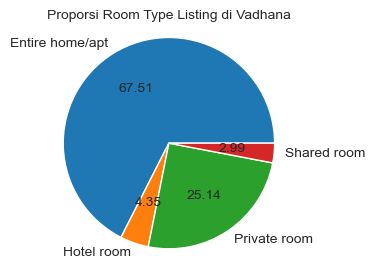

In [82]:
#Melihat proporsi room type di Vadhana

plt.figure(figsize=(3,3))
plt.pie(roomVadhana2['Vadhana'],
        labels=roomVadhana2['room_type'],
        autopct='%.2f',
        explode=(0,0,0,0))
plt.axis('equal')
plt.title('Proporsi Room Type Listing di Vadhana', size=10)
plt.show()

In [83]:
#Cek room type di Khlong Toei

print('ROOM TYPE DI KHLONG TEI')
roomVadhana = roomNeigh.loc['Khlong Toei'].reset_index()
roomVadhana2 = roomVadhana.drop(4, axis=0)
roomVadhana2


ROOM TYPE DI KHLONG TEI


,room_type,Khlong Toei
0,Entire home/apt,1393
1,Hotel room,59
2,Private room,420
3,Shared room,15


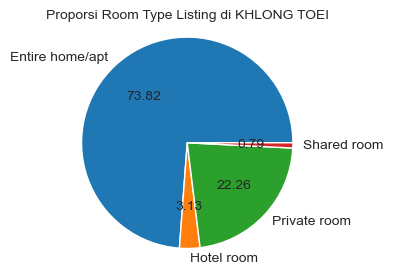

In [84]:
#Melihat proporsi room type di Khlong Toei

plt.figure(figsize=(3,3))
plt.pie(roomVadhana2['Khlong Toei'],
        labels=roomVadhana2['room_type'],
        autopct='%.2f',
        explode=(0,0,0,0))
plt.axis('equal')
plt.title('Proporsi Room Type Listing di KHLONG TOEI', size=10)
plt.show()

## **D.2.1. INSIGHT STRATEGI TIPE PROPERTI YANG DITAWARKAN INVESTOR**

Pilihan tawaran properti di Vadhana atau Khlong Toei:
1. Entire home/apt > 60%
1. Private Room >20%

Untuk investasi premium maka opsi terbaik adalah Entire home/apt

Home vs Apartemen?

* Secara situasional home (prioritas 1) dapat di split disewakan sebagai private room

* Namun untuk ketersediaan properti, apartemen (prioritas 2) jelas lebih tersedia suplainya dengan harga lebih kompetitif


## **D.3. Strategi Kompetisi**

In [85]:
#Cek jumlah kompetitor di seluruh Bangkok

jmlKompetitor = airbnbBangkok['host_name'].nunique()
print('jumlah kompetitor host di seluruh Bangkok: ', jmlKompetitor)

jumlah kompetitor host di seluruh Bangkok:  4980


In [86]:
#Cek jumlah kompetitor per neigbourhood

kompetitor = airbnbBangkok.groupby('neighbourhood')
kompetitor1 = kompetitor['host_name'].nunique().reset_index().sort_values(by=['host_name'], ascending=False)
print('JUMLAH KOMPETITOR PER NEIGHBOURHOOD')
kompetitor1.head(2)


JUMLAH KOMPETITOR PER NEIGHBOURHOOD


,neighbourhood,host_name
47,Vadhana,849
22,Khlong Toei,686


In [87]:
# cek siapa kompetitor dengan jumlah listing properti terbanyak di Bangkok

print('NAMA KOMPETITOR DENGAN LISTING PROPERTI TERBANYAK DI BANGKOK')
airbnbBangkok['host_name'].value_counts().reset_index().head(10)


NAMA KOMPETITOR DENGAN LISTING PROPERTI TERBANYAK DI BANGKOK


,host_name,count
0,Curry,221
1,Noons,97
2,K,77
3,Pornchai,63
4,Alex,58
5,Bee,58
6,Nana,55
7,Patty,54
8,Ludoping,54
9,Summer,50


In [88]:
#Cek neighbourhood dengan nama host yang memiliki listing properti terbanyak 

print('NAMA KOMPETITOR DENGAN LISTING PROPERTI TERBANYAK PER NEIGHBOURHOOD')
kompetitor = airbnbBangkok.groupby('neighbourhood')
kompetitor1 = kompetitor['host_name'].value_counts().reset_index().sort_values(by=['count'], ascending=False)
kompetitor1.head(5)

NAMA KOMPETITOR DENGAN LISTING PROPERTI TERBANYAK PER NEIGHBOURHOOD


,neighbourhood,host_name,count
4971,Ratchathewi,Curry,72
4619,Phra Nakhon,Pornchai,62
2163,Huai Khwang,Curry,55
798,Bang Rak,K,46
2869,Khlong Toei,Curry,45


In [89]:
#Mengecek kompetitor di Vadhana selaku lokasi prioritas investasi pertama

print('KOMPETITOR DI VADHANA')
kompetitorVadhana = kompetitor1[kompetitor1['neighbourhood']=='Vadhana']
kompetitorVadhana.head(10)

KOMPETITOR DI VADHANA


,neighbourhood,host_name,count
6078,Vadhana,Lek Boonsiri,41
6079,Vadhana,Ludoping,36
6080,Vadhana,Mike,30
6081,Vadhana,Max,26
6082,Vadhana,Terry,25
6083,Vadhana,Ed,24
6084,Vadhana,Ho,21
6085,Vadhana,Joseph,19
6086,Vadhana,Rachan,18
6088,Vadhana,Mint,14


In [90]:
#Mengecek kompetitor di Khlong Toei selaku lokasi prioritas investasi kedua

print('KOMPETITOR DI KHLONG TOEI')
kompetitorKhlongToei = kompetitor1[kompetitor1['neighbourhood']=='Khlong Toei']
kompetitorKhlongToei.head(10)

KOMPETITOR DI KHLONG TOEI


,neighbourhood,host_name,count
2869,Khlong Toei,Curry,45
2870,Khlong Toei,Summer,39
2871,Khlong Toei,Noons,33
2872,Khlong Toei,Camila,30
2873,Khlong Toei,Ken-Bambu,29
2874,Khlong Toei,Erica,27
2875,Khlong Toei,Cora,26
2876,Khlong Toei,Sophia,26
2877,Khlong Toei,Prem,24
2878,Khlong Toei,Nana,22


## **D.3.1. INSIGHT STRATEGI KOMPETISI BAGI INVESTOR**

Vadhana dan Khlong Toei terpadat 

Kompetitor serius area Bangkok: 
1. Curry (listing terbanyak di Bangkok dan beberapa neighbourhood) 
1. Noons

Kompetitor serius di Vadhana: 
1. Lek Boonsiri
1. Ludoping

Kompetitor serius di Khlong Toei: 
1. Curry
1. Summer
1. Noons

**Terapkan strategi ‘ME TOO’ yaitu menempel lokasi kompetitor untuk mengambil porsi pasar dan menutup ekspansi**

## **E. REKOMENDASI ACTION BAGI INVESTOR**

1. Lokasi investasi premium: Vadhana (prioritas) dan Khlong Toei (prioritas 2)

1. Pilih Vadhana bila harga tidak menjadi masalah, supply tersedia, dan siap menghadapi kompetitor

1. Khlong Toei memiliki daerah slum yang bisa dikembangkan (wikipedia)

1. Tetapkan harga sewa di Vadhana (kisaran 1.732 THB) dan Khlong Toei (kisaran 1581 T) (perhatikan tingkat booking season,  tipe properti, dan lokasi)

1. Pilih tipe home (bisa displit per kamar) dan/atau apartemen (lebih tersedia suplainya)

1. Terapkan strategi ‘ME TOO’ (mengikuti kemana kompetitor pergi) guna menikmati porsi pasar yang selama didominasi kompetitor. Dalam jangka panjang akan menutup peluang ekspansi kompetitor.

1. Jadi pemain utama. Kompetisi akan menjadikan pasar berkembang. Benchmark untuk menjadi pemain utama:
    1. Di pasar Bangkok = 221 listing properti

    1. Di pasar Vadhana = 41 listing properti
    
    1. Di pasar Khlong Toei = 45 listing properti